In [1]:
import sys
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import albumentations as A

from pathlib import Path
from albumentations.pytorch import ToTensorV2

sys.path.append("../src/data_processing")
from dataset import Manga109Dataset

In [2]:
JSON_PATH = Path("../data/processed/test_coco.json")
IMG_DIR = Path("../data/raw/images")

dataset = Manga109Dataset(JSON_PATH, IMG_DIR)
len(dataset)

1186

In [11]:
idx = random.randint(0, len(dataset) - 1)
img_tensor, target = dataset[idx]
img_np = img_tensor.permute(1, 2, 0).numpy()

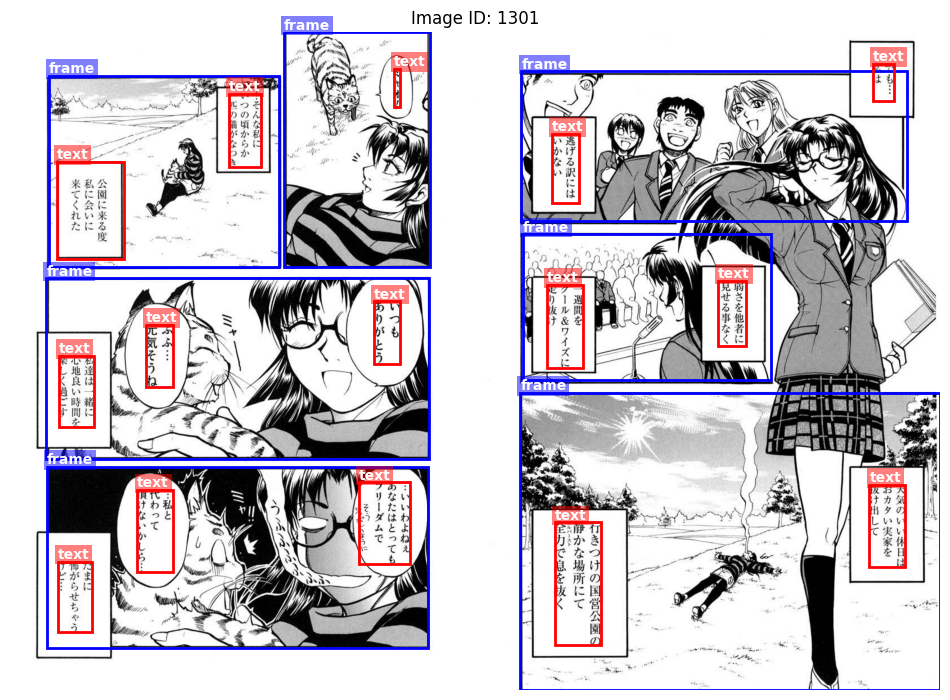

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(12, 16))
ax.imshow(img_np)

boxes = target["boxes"].numpy()
labels = target["labels"].numpy()

for box, label in zip(boxes, labels):
    xmin, ymin, xmax, ymax = box
    width = xmax - xmin
    height = ymax - ymin 

    color = "blue" if label == 1 else "red"
    label_text = "frame" if label == 1 else "text"

    rect = patches.Rectangle(
        (xmin, ymin), width, height,
        linewidth=2, edgecolor=color, facecolor="none"
    )
    ax.add_patch(rect)
    
    ax.text(xmin, ymin-5, label_text, color="white", fontsize=10, weight="bold", 
            bbox=dict(facecolor=color, alpha=0.5, edgecolor="none", pad=2))
    
plt.axis("off")
plt.title(f"Image ID: {target["image_id"].item()}")
plt.show()